# Travel Maps

I created a `travelmaps`-function which adjusts some settings and provides the three functions `country`, `city`, and `arrow`.
The settings consist of a tweaked version of the [xkcd-style](http://jakevdp.github.io/blog/2013/07/10/XKCD-plots-in-matplotlib),
the colour-cycle from [Bayesian Methods for Hackers](https://github.com/pkgpl/PythonProcessing/blob/master/results/matplotlibrc.bmh.txt), and setting the `figure.dpi` and `savefig.dpi` to the same value, so the on-screen figures look like the saved pdfs.

The function `country` is an adapted version from a blogpost by [Thomas Lecocq](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued). It plots a country, or a list of countries, with given face- and edge-colours on a given basemap, where I got the country shapefiles from *Global Administrative Areas* ([gadm.org](http://gadm.org)).

The other two functions, `city` and `arrow`, are simply `matplotlib`-`plot` and -`annotate` functions, to plot cities and connect them with arrows.

In [1]:
import travelmaps as tm
from adashof import cm2in
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

(You can find the two functions `travelmaps` and `adashof` in my [GitHub repo](https://github.com/prisae/blog-notebooks).)

## Global Map

This first example is a global map, where a number of countries is highlighted.

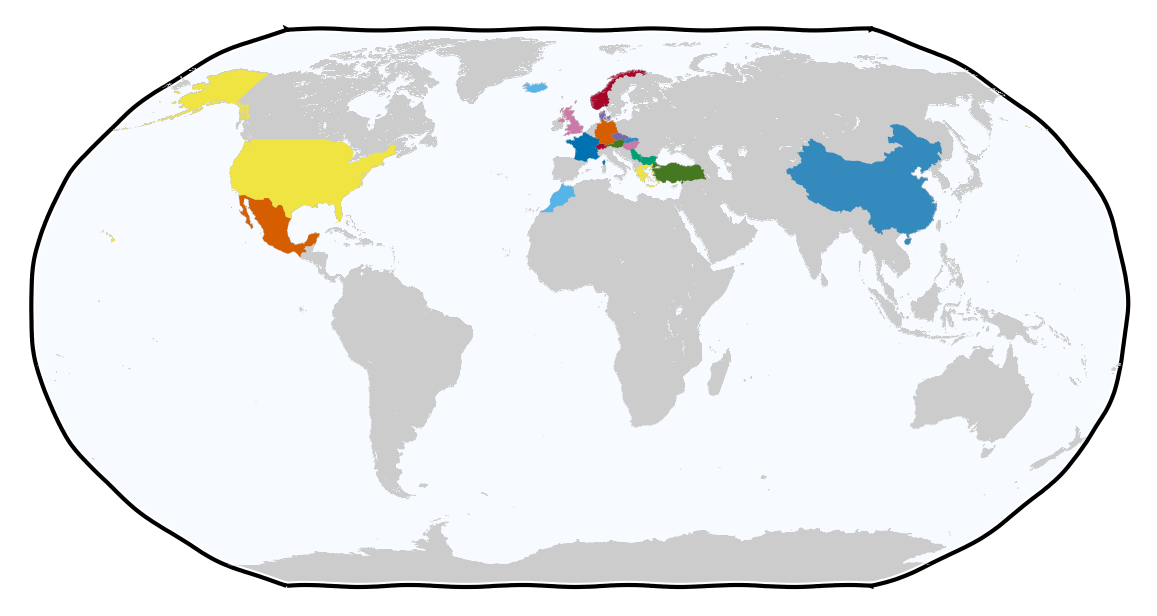

In [2]:
fig_g = plt.figure(figsize=(cm2in([12, 8])))

# Create basemap
m_g = Basemap(resolution='i', projection='robin', lon_0=0)

# Make continents grey, and oceans slighty blue
m_g.drawlsmask(land_color='.8', ocean_color='#f7fbff')
m_g.drawcoastlines(color='.8', linewidth=.1)
m_g.drawcountries(color='.8', linewidth=.1)

# Fill visited countries
countries = ['CHN', 'CHE', 'DNK', 'TUR', 'MEX', 'HUN', 'ISL', 'BGR', 'GRC', 'FRA',
             'SVK', 'NOR', 'CZE', 'AUT', 'DEU', 'GBR', 'MAR', 'SRB', 'USA',]
tm.country(countries, m_g)

#plt.savefig('plots/World.png', bbox_inches='tight', pad_inches=0.02)

plt.show()

## East Europe Trip

The second example is a local map with several visited countries. Here, the `drawlsmask` and `drawcountries` functions of `basemap` do not yield a satisfying result. I therefore plot the visited as well as the not visited countries with `tm.countries`, the former in colour and the latter grey.

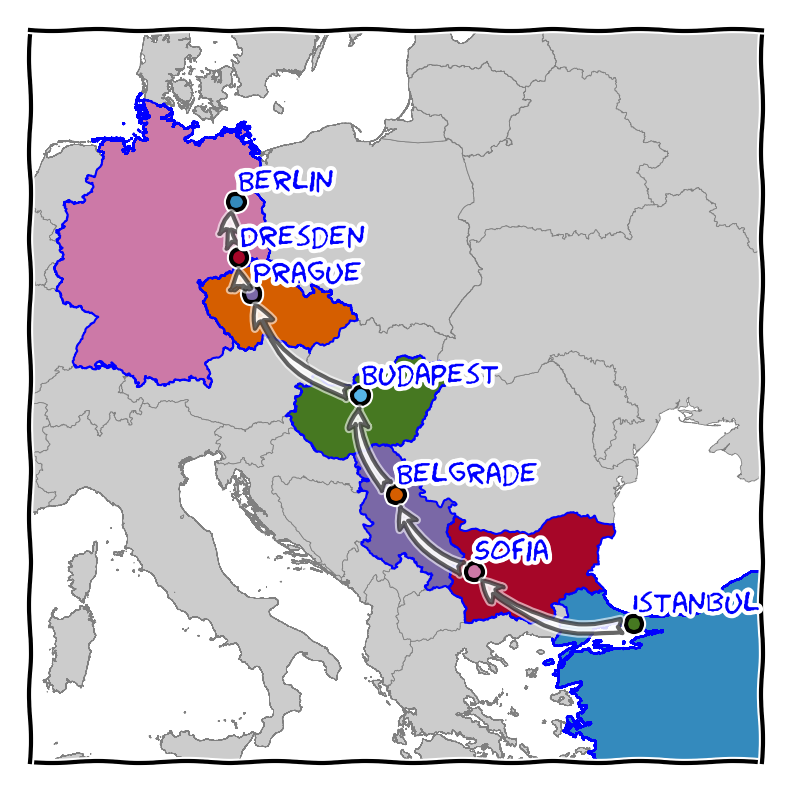

In [3]:
fig_e = plt.figure(figsize=(cm2in([8, 8])))

# Cities
BUD = [47.4925, 19.051389]   # Budapest
SOF = [42.7, 23.333333]      # Sofia
IST = [41.013611, 28.955]    # Istanbul
PRA = [50.083333, 14.416667] # Prague
BEL = [44.816667, 20.466667] # Belgrade
DRE = [51.033333, 13.733333] # Dresden
BER = [52.516667, 13.383333] # Berlin

# Create basemap
m_e = Basemap(width=2200000, height=2200000, resolution='c',
              projection='tmerc', lat_0=BUD[0], lon_0=BEL[1])

# Fill non-visited countries (fillcontinents does an unsatisfying job)
countries = ['AUT', 'CHE', 'FRA', 'DNK', 'SVK', 'GRC', 'ALB',
             'ITA', 'LIE', 'POL', 'ROU', 'SVN', 'BEL', 'HRV',
             'TUN', 'NLD', 'RUS', 'SWE', 'LUX', 'BLR', 'LTU',
             'EST', 'LVA', 'UKR', 'MDA', 'DZA', 'BIH', 'KO-',
             'MKD', 'MNE',]
tm.country(countries, m_e, fc='.8', ec='.5', lw=.2)

# Fill visited countries
visited = ['TUR', 'BGR', 'SRB', 'HUN', 'CZE', 'DEU',]
tm.country(visited, m_e, ec='b', lw=.5)

# Add cities
offs = [0, .4]
tm.city(BER, 'Berlin', m_e, offs=offs)
tm.city(DRE, 'Dresden', m_e, offs=offs)
tm.city(PRA, 'Prague', m_e, offs=offs)
tm.city(IST, 'Istanbul', m_e, offs=offs)
tm.city(BEL, 'Belgrade', m_e, offs=offs)
tm.city(SOF, 'Sofia', m_e, offs=offs)
tm.city(BUD, 'Budapest', m_e, offs=offs)

# Connect with arrows
tm.arrow(IST, SOF, m_e)
tm.arrow(SOF, BEL, m_e)
tm.arrow(BEL, BUD, m_e)
tm.arrow(BUD, PRA, m_e)
tm.arrow(PRA, DRE, m_e)
tm.arrow(DRE, BER, m_e)

#plt.savefig('plots/EastEurope.png', bbox_inches='tight', pad_inches=0.02)

plt.show()

## Scotland

This last examples is another local map one, with only one country this time.

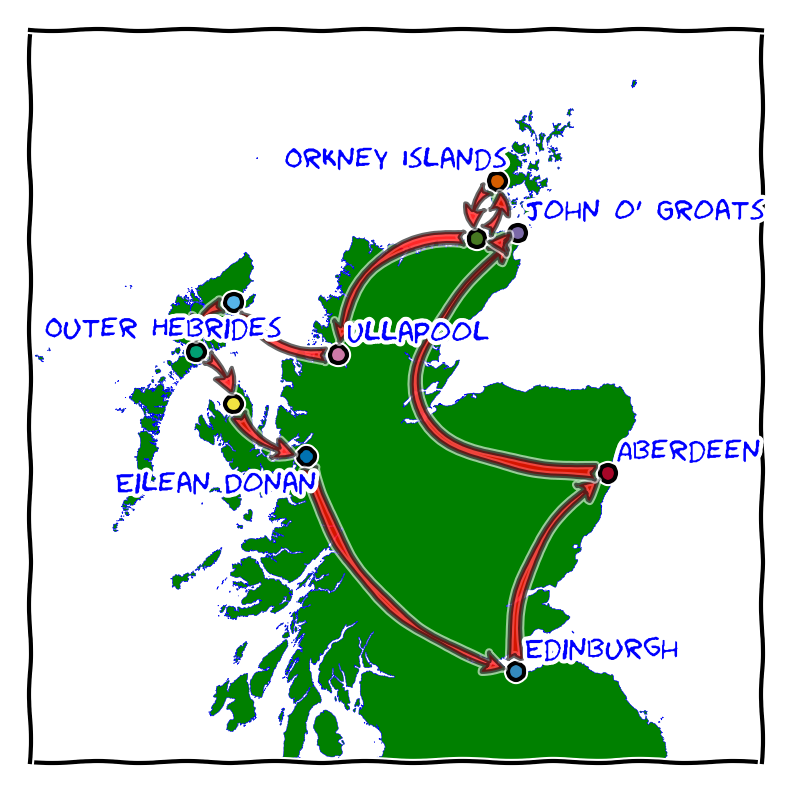

In [4]:
fig_s = plt.figure(figsize=(cm2in([8, 8])))

# Cities
EDI = [55.953056, -3.188889] # Edinburgh
JOG = [58.64, -3.07]         # John o' Groats
ABD = [57.1526, -2.11]       # Aberdeen
INV = [57.4718, -4.2254]     # Inverness
SCR = [58.609722, -3.5525]   # Scrabster
STR = [58.96, -3.3]          # Stromness
ULL = [57.9, -5.166]         # Ullapool
STO = [58.209, -6.387]       # Stornoway
TAR = [57.897749, -6.800595] # Tarbert
UIG = [57.586, -6.357]       # Uig
EID = [57.274028, -5.516111] # Eilean Donan

# Create basemap
m_s = Basemap(width=500000, height=500000, resolution='c',
              projection='tmerc', lat_0=57.65, lon_0=-4.5)

# Fill country
tm.country('GBR', m_s, fc='g', ec='b', lw=.1)

# Add cities
tm.city(EDI, 'Edinburgh', m_s)
tm.city(ABD, 'Aberdeen', m_s)
tm.city(JOG, "John o' Groats", m_s)
tm.city(SCR, '', m_s, halign='right')
tm.city(STR, 'Orkney Islands', m_s, halign='right')
tm.city(ULL, 'Ullapool', m_s)
tm.city(STO, '', m_s)
tm.city(TAR, 'Outer Hebrides', m_s, offs=[-.4, .1], halign='center')
tm.city(UIG, '', m_s)
tm.city(EID, 'Eilean Donan', m_s, offs=[.1, -.2], halign='right')

# Connect with arrows
tm.arrow(EDI, ABD, m_s, fc='r')
tm.arrow(ABD, JOG, m_s, fc='r', rad=-1.2)
tm.arrow(JOG, SCR, m_s, fc='r')
tm.arrow(SCR, STR, m_s, fc='r', rad=.4)
tm.arrow(STR, SCR, m_s, fc='r', rad=.4)
tm.arrow(SCR, ULL, m_s, fc='r', rad=.5)
tm.arrow(ULL, STO, m_s, fc='r')
tm.arrow(STO, TAR, m_s, fc='r', rad=.5)
tm.arrow(TAR, UIG, m_s, fc='r')
tm.arrow(UIG, EID, m_s, fc='r', rad=.3)
tm.arrow(EID, EDI, m_s, fc='r', rad=.3)

#plt.savefig('plots/Scotland.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Norway

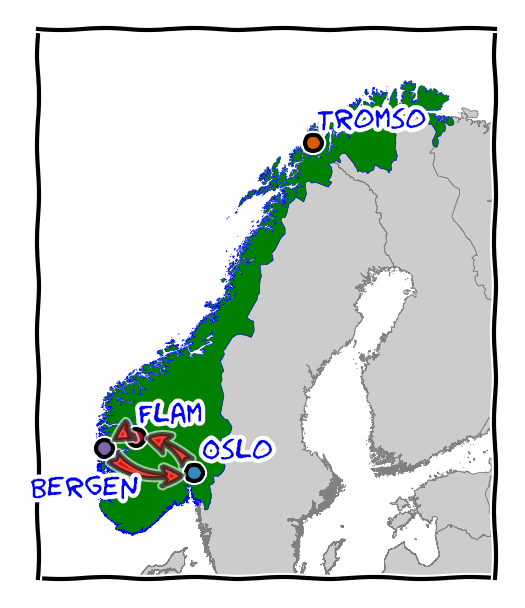

In [5]:
fig_n = plt.figure(figsize=(cm2in([8, 6])))

TRO = [69.682778, 18.942778] # Tromsø
BER = [60.389444, 5.33] # Bergen
FLA = [60.838056, 7.120556] # Flåm
OSL = [59.95, 10.75] # Oslo

# Create basemap
# resolution: c, l, i, h, f
m_n = Basemap(width=1500000, height=1800000, resolution='c',
              projection='tmerc', lat_0=65, lon_0=15)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DNK', 'FIN', 'RUS', 'SWE', 'EST', 'LVA']
tm.country(countries, m_n, fc='.8', ec='.5', lw=.2)

# Fill country
tm.country('NOR', m_n, 'g', 'b', .1)

# Add visited cities
tm.city(OSL, 'Oslo', m_n, offs=[.4,.5])
tm.city(FLA, 'Flam', m_n, offs=[0,.5])
tm.city(BER, 'Bergen', m_n, offs=[2.2, -1.2], halign='right')
tm.city(EDI, '', m_n) # Not on map, to use green in cycle
tm.city(TRO, 'Tromso', m_n, offs=[.4,.5])

# Connect with arrows
#tm.arrow(OSL, TRO, m_n, fc='r')
#tm.arrow(TRO, OSL, m_n, fc='r')
tm.arrow(OSL, FLA, m_n, fc='r', rad=.3)
tm.arrow(FLA, BER, m_n, fc='r', rad=.3)
tm.arrow(BER, OSL, m_n, fc='r', rad=.3)

#plt.savefig('plots/Norway.png', bbox_inches='tight', pad_inches=0.02)

plt.show()

## Paris

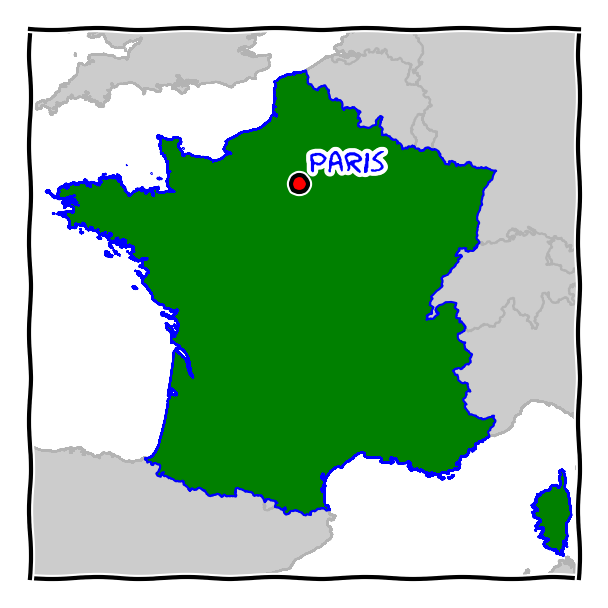

In [6]:
fig_p = plt.figure(figsize=(cm2in([6, 6])))

PAR = [48.8567, 2.3508] # Paris

# Create basemap
m_p = Basemap(width=1200000, height=1200000, resolution='c',
              projection='tmerc', lat_0=46.5, lon_0=2.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['GBR', 'DEU', 'ITA', 'ESP', 'LUX', 'BEL', 'CHE',
             'NLD', 'LIE', 'AUT', 'AND']
tm.country(countries, m_p, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('FRA', m_p, 'g', 'b', .5)

# Add visited cities
tm.city(PAR, 'Paris', m_p, 'r', offs=[.3,.3])

#plt.savefig('plots/Paris.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Vegas

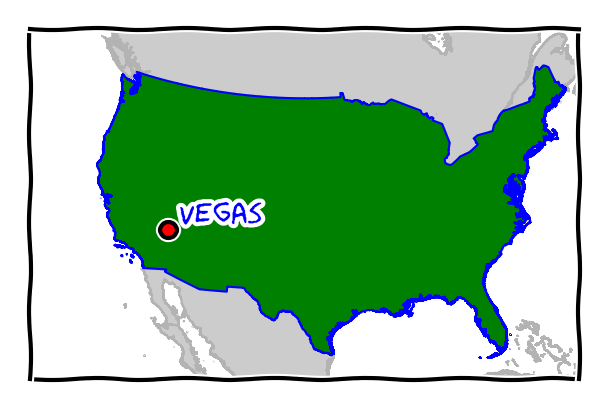

In [7]:
fig_v = plt.figure(figsize=(cm2in([6, 4])))

VEG = [36.175, -115.136389] # Vegas

# Create basemap
m_v = Basemap(width=5500000, height=3500000, resolution='c',
              projection='tmerc', lat_0=39.5, lon_0=-100)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['MEX', 'CUB', 'CAN', 'BHS']
tm.country(countries, m_v, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('USA', m_v, 'g', 'b', .5)

# Add visited cities
tm.city(VEG, 'Vegas', m_v,'r', offs=[1,1])

#plt.savefig('plots/Vegas.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Beijing

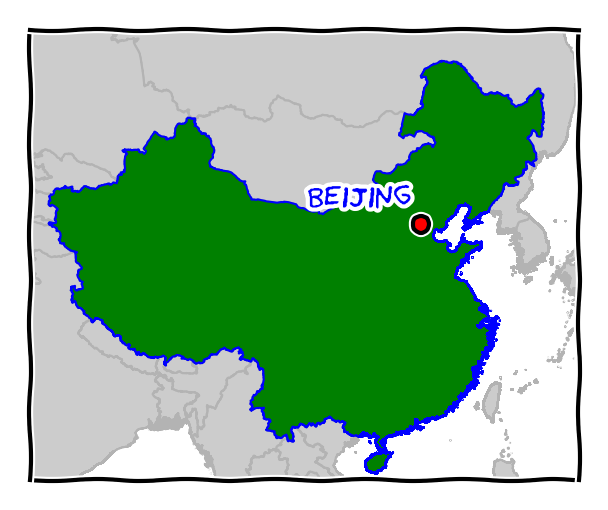

In [8]:
fig_b = plt.figure(figsize=(cm2in([6, 5])))

BEI = [39.916667, 116.383333] # Beijing

# Create basemap
m_b = Basemap(width=5500000, height=4500000, resolution='c',
              projection='tmerc', lat_0=38, lon_0=103)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['RUS', 'KOR', 'MNG', 'PRK', 'TWN', 'BGD', 'BTN',
             'IND', 'KGZ', 'NPL', 'TJK', 'JPN', 'KAZ', 'LAO',
             'MMR', 'PHL', 'AFG', 'PAK', 'THA', 'UZB', 'VNM']
tm.country(countries, m_b, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('CHN', m_b, 'g', 'b', .5)

# Add visited cities
tm.city(BEI, 'Beijing', m_b, 'r', offs=[-1,2], halign='right')

#plt.savefig('plots/Beijing.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Austria / Slovakia

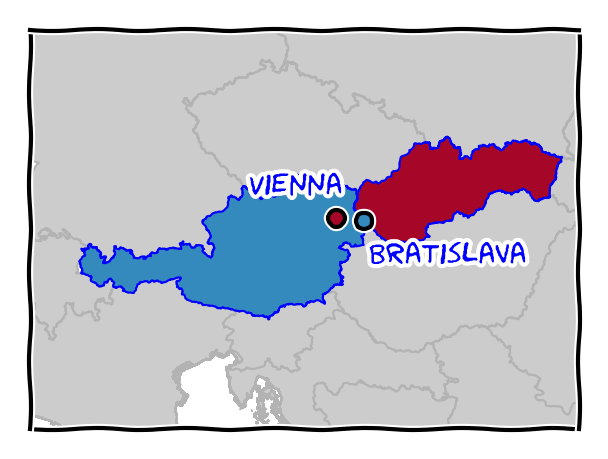

In [9]:
fig_a = plt.figure(figsize=(cm2in([6, 4.5])))

VIE = [48.2, 16.366667] # Vienna
BRA = [48.143889, 17.109722] # Bratislava

# Create basemap
m_a = Basemap(width=1100000, height=800000, resolution='c',
              projection='tmerc', lat_0=48, lon_0=15.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'CHE', 'ITA', 'CZE', 'HRV', 'SVN', 'HUN',
             'POL', 'UKR', 'ROU', 'BIH', 'SRB']
tm.country(countries, m_a, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country(['AUT', 'SVK'], m_a, ec='b', lw=.5)

# Add visited cities
tm.city(BRA, 'Bratislava', m_a, offs=[.1,-.7])
tm.city(VIE, 'Vienna', m_a, offs=[.1,.5], halign='right')

#plt.savefig('plots/AustriaSlovakia.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Morocco

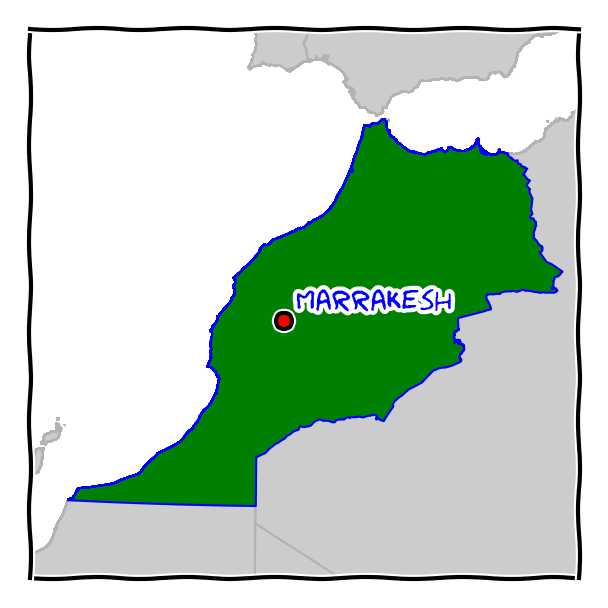

In [10]:
fig_m = plt.figure(figsize=(cm2in([6, 6])))

MAR = [31.63, -8.008889] # Marrakesh

# Create basemap
m_m = Basemap(width=1300000, height=1300000, resolution='c',
              projection='tmerc', lat_0=32, lon_0=-7.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['ESP', 'ESH', 'MRT', 'PRT', 'DZA']
tm.country(countries, m_m, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('MAR', m_m, 'g', 'b', .5)

# Add visited cities
tm.city(MAR, 'Marrakesh', m_m, 'r', offs=[.3,.3])

#plt.savefig('plots/Marrakesh.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Denmark

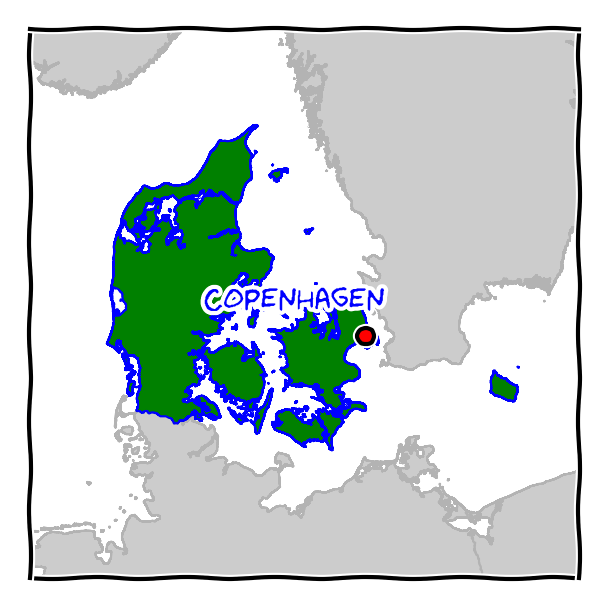

In [11]:
fig_d = plt.figure(figsize=(cm2in([6, 6])))

COP = [55.676111, 12.568333] # Copenhagen

# Create basemap
m_d = Basemap(width=600000, height=600000, resolution='c',
              projection='tmerc', lat_0=56, lon_0=11.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'POL', 'SWE', 'NOR']
tm.country(countries, m_d, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('DNK', m_d, 'g', 'b', .5)

# Add visited cities
tm.city(COP, 'Copenhagen', m_d, 'r', offs=[.3,.3], halign='right')

#plt.savefig('plots/Copenhagen.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Mexico

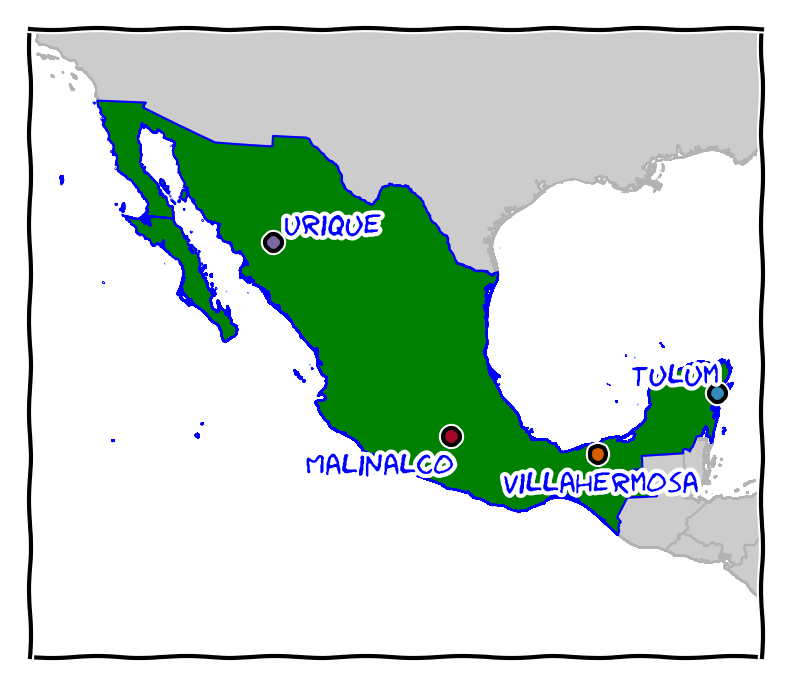

In [12]:
fig_x = plt.figure(figsize=(cm2in([8, 7])))

MDF = [19.433333, -99.133333]  # Mexico City
TUL = [20.214722, -87.428889]  # Tulum
MAL = [18.95, -99.5]           # Malinalco
URI = [27.216667, -107.916667] # Urique
VIL = [17.989167, -92.928056]  # Villahermosa

# Create basemap
m_x = Basemap(width=3500000, height=3000000, resolution='c',
              projection='tmerc', lat_0=23, lon_0=-102)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
tm.country(countries, m_x, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country('MEX', m_x, 'g', 'b', .5)

# Add visited cities
#tm.city(MDF, 'Mexico City', m_x, 'r', offs=[.3, .3])
tm.city(TUL, 'Tulum', m_x, offs=[0, .5], halign='right')
tm.city(MAL, 'Malinalco', m_x, offs=[0, -1.5], halign='right')
tm.city(URI, 'Urique', m_x, offs=[.5, .5])
tm.city(EDI, '', m_x) # to use the green dot
tm.city(VIL, 'Villahermosa', m_x, offs=[0, -1.5], halign='center')

#plt.savefig('plots/Mexico.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Switzerland/Lichtenstein

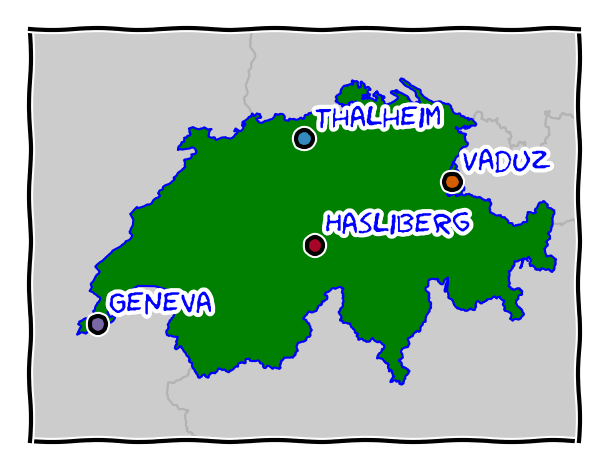

In [13]:
fig_f = plt.figure(figsize=(cm2in([6, 5])))

THA = [47.433333, 8.1] # Thalheim
HAS = [46.733333, 8.2] # Hasliberg
GEN = [46.2, 6.15]     # Geneva
VAD = [47.141, 9.521]  # Vaduz

# Create basemap
m_f = Basemap(width=400000, height=300000, resolution='c',
              projection='tmerc', lat_0=46.8, lon_0=8.1)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'AUT', 'ITA', 'FRA']
tm.country(countries, m_f, fc='.8', ec='.7', lw=.5)

# Fill country
tm.country(['CHE', 'LIE'], m_f, 'g', ec='b', lw=.5)

# Plot cities
tm.city(THA, 'Thalheim', m_f)
tm.city(HAS, 'Hasliberg', m_f)
tm.city(GEN, 'Geneva', m_f)
tm.city(EDI, '', m_f) # to use green
tm.city(VAD, 'Vaduz', m_f)

#lt.savefig('plots/Switzerland.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Iceland

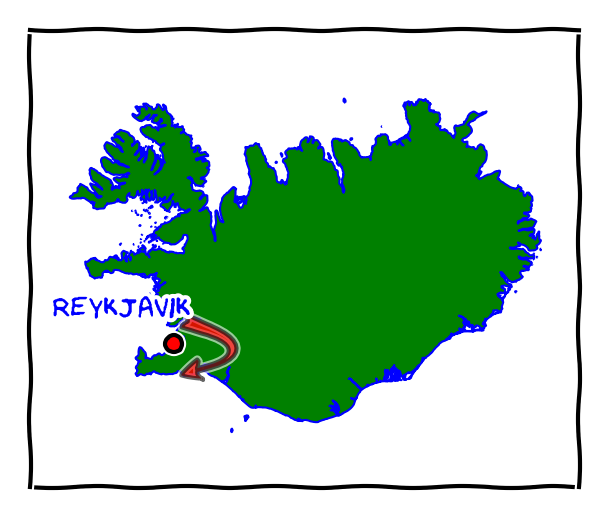

In [14]:
fig_i = plt.figure(figsize=(cm2in([6, 5])))

REY = [64.133333, -21.933333] # Reykjavík

# Create basemap
m_i = Basemap(width=600000, height=500000, resolution='c',
              projection='tmerc', lat_0=65, lon_0=-19)

# Fill country
tm.country('ISL', m_i, 'g', 'b', .5)

# Add visited cities
tm.city(REY, 'Reykjavik', m_i, 'r', offs=[.3,.3], halign='right')

tm.arrow([64.4, -22.], [63.8, -22.], m_i, fc='r', rad=-2)

#plt.savefig('plots/Reykjavik.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## UK

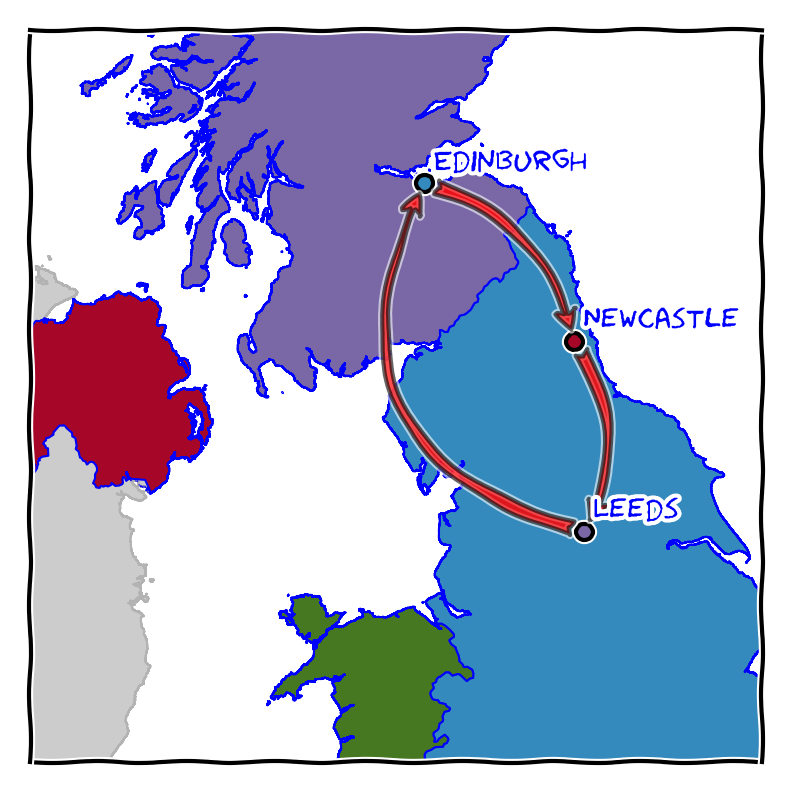

In [15]:
fig_c = plt.figure(figsize=(cm2in([8, 8])))

# Cities
NEW = [54.966667, -1.6]      # Newcastle
LED = [53.799722, -1.549167] # Leeds

# Create basemap
m_c = Basemap(width=500000, height=500000, resolution='c',
              projection='tmerc', lat_0=54.65, lon_0=-3.5)
#m_c.drawcountries()

# Fill non-visited countries (fillcontinents does a bad job)
tm.country('IRL', m_c, fc='.8', ec='.7', lw=.5)

# Fill country
# (adm1; the four indivdual of the UK and Northen Ireland)
tm.country('GBR', m_c, ec='b', lw=.5, adm=1)

# Add visited cities
tm.city(EDI, 'Edinburgh', m_c)
tm.city(NEW, 'Newcastle', m_c)
tm.city(LED, 'Leeds', m_c)

# Connect with arrows
tm.arrow(EDI, NEW, m_c, fc='r')
tm.arrow(NEW, LED, m_c, fc='r')
tm.arrow(LED, EDI, m_c, fc='r', rad=-.6)

#plt.savefig('plots/England.png', bbox_inches='tight', pad_inches=0.02)
    
plt.show()

## Summary Plot for Blog Post

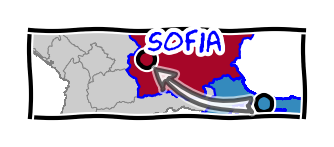

In [16]:
fig_e = plt.figure(figsize=(cm2in([3, 1])))

# Create basemap
m_e = Basemap(width=1100000, height=350000, resolution='c',
              projection='tmerc', lat_0=SOF[0]-.5, lon_0=SOF[1]+1)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['SRB', 'ALB', 'ROU', 'GRC', 'HRV', 'MDA', 'BIH',
             'MNE', 'KO-', 'MKD']
tm.country(countries, m_e, fc='.8', ec='.5', lw=.2)

# Fill visited countries
tm.country(['TUR', 'BGR'], m_e, ec='b', lw=.5)

# Add visited cities
offs = [0, .4]
tm.city(IST, '', m_e, offs=offs)
tm.city(SOF, 'Sofia', m_e, offs=offs)

# Connect with arrows
tm.arrow(IST, SOF, m_e)

#plt.savefig('plots/travelmap_summary.png', bbox_inches='tight', pad_inches=0.02)

plt.show()